# WEEK - 3 ASSIGNMENTS
## Data Science & Data Analytics Laboratory
### Name: Kinjal Raykarmakar
#### Section: CSE 3H
#### Roll No.: 29
#### Enrollment No.: 12018009019439

# k Nearest Neighbours

In [12]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
import pandas as pd

In [13]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = pd.DataFrame(iris.target)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [26]:
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [29]:
targetVsPredicted = pd.DataFrame()
targetVsPredicted["Target"] = Y_test
targetVsPredicted["Predicted"] = Y_pred

targetVsPredicted

,Target,Predicted
147,2,2
89,1,1
109,2,2
141,2,2
68,1,1
21,0,0
70,1,1
113,2,2
18,0,0
27,0,0


In [31]:
from sklearn.metrics import accuracy_score

print(f"{accuracy_score(Y_pred, Y_test).round(2)*100}%")

96.0%


In [37]:
scores = []
k_range = range(1, 31)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    scores.append(accuracy_score(Y_pred, Y_test).round(2)*100)

In [47]:
for k in k_range:
    print(f"k={k}: {scores[k-1]}%")

k=1: 96.0%
k=2: 96.0%
k=3: 96.0%
k=4: 93.0%
k=5: 96.0%
k=6: 93.0%
k=7: 93.0%
k=8: 93.0%
k=9: 93.0%
k=10: 91.0%
k=11: 93.0%
k=12: 93.0%
k=13: 93.0%
k=14: 93.0%
k=15: 93.0%
k=16: 91.0%
k=17: 91.0%
k=18: 91.0%
k=19: 91.0%
k=20: 91.0%
k=21: 93.0%
k=22: 93.0%
k=23: 93.0%
k=24: 91.0%
k=25: 93.0%
k=26: 93.0%
k=27: 93.0%
k=28: 91.0%
k=29: 93.0%
k=30: 91.0%


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

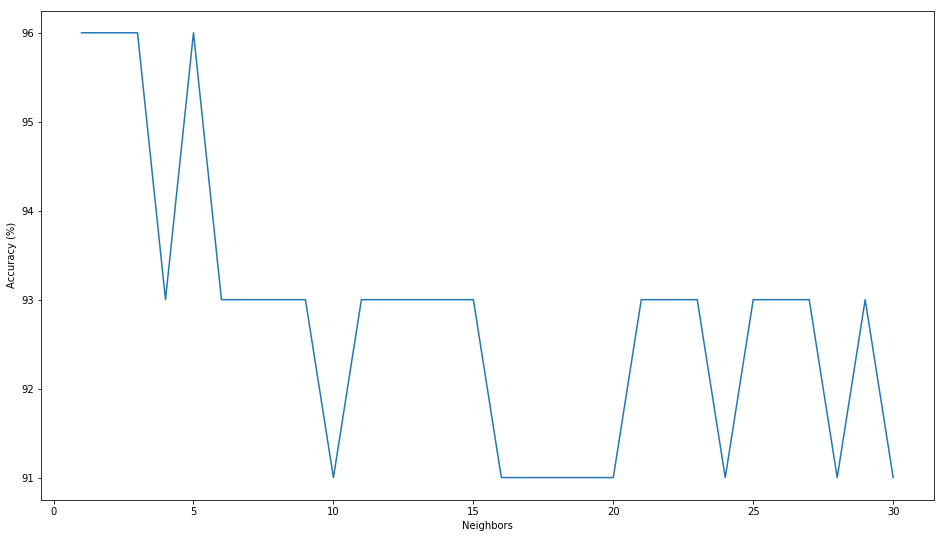

In [45]:
plt.figure(figsize=(16,9))
plt.plot(k_range, scores)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy (%)")
plt.show()